In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime, timedelta

# Grafiklerin notebook içinde görünmesini sağlar
%matplotlib inline

In [3]:
# API Parametreleri
API_KEY = "wWS0XI0AASP0FkuTJ24o2CrydKIstuZn" 
TICKER = "AAPL"

# Tarihleri dinamik olarak hesaplayalım (Son 90 gün)
end_date = (datetime.now() - timedelta(days=1)).strftime('%Y-%m-%d')
start_date = (datetime.now() - timedelta(days=90)).strftime('%Y-%m-%d')

# Massive API URL Formatı
url = f"https://api.massive.com/v2/aggs/ticker/{TICKER}/range/1/day/{start_date}/{end_date}?adjusted=true&sort=asc&apiKey={API_KEY}"

print(f"İstek atılacak URL: {url}")

İstek atılacak URL: https://api.massive.com/v2/aggs/ticker/AAPL/range/1/day/2025-11-15/2026-02-12?adjusted=true&sort=asc&apiKey=wWS0XI0AASP0FkuTJ24o2CrydKIstuZn


In [4]:
response = requests.get(url)

# İsteğin başarılı olup olmadığını kontrol edelim (200 OK)
if response.status_code == 200:
    api_data = response.json()
    print("Veri başarıyla çekildi!")
    # JSON yapısını görmek için ilk sonucu basalım
    print(api_data['results'][0]) 
else:
    print(f"Hata oluştu: {response.status_code}")

Veri başarıyla çekildi!
{'v': 45018260.0, 'vw': 267.9841, 'o': 268.815, 'c': 267.46, 'h': 270.49, 'l': 265.73, 't': 1763355600000, 'n': 705791}


In [6]:
# 1. 'results' listesinden DataFrame oluşturalım
apple_df = pd.DataFrame(api_data['results'])

# 2. Unix timestamp (t) kolonunu okunabilir tarihe çevirelim
# Unit='ms' çünkü Massive/Polygon veriyi milisaniye cinsinden gönderir
apple_df['date'] = pd.to_datetime(apple_df['t'], unit='ms')

# 3. Tarihi index yapalım (Analiz ve grafik için en iyi yöntem budur)
apple_df.set_index('date', inplace=True)

# 4. Kolon isimlerini daha anlaşılır hale getirelim
# Proje dokümanına uygun olarak: o->open, c->close, h->high, l->low
apple_df = apple_df.rename(columns={
    'o': 'open',
    'c': 'close',
    'h': 'high',
    'l': 'low',
    'v': 'volume'
})

# 5. Gereksiz veya karmaşık kolonları (vw, n, t gibi) şimdilik temizleyebiliriz
apple_df = apple_df[['open', 'close', 'high', 'low', 'volume']]

# Sonucu görelim
apple_df.head()

,open,close,high,low,volume
date,,,,,
2025-11-17 05:00:00,268.815,267.46,270.49,265.73,45018260.0
2025-11-18 05:00:00,269.990,267.44,270.71,265.32,45677278.0
2025-11-19 05:00:00,265.525,268.56,272.21,265.50,40424492.0
2025-11-20 05:00:00,270.830,266.25,275.43,265.92,45823568.0
2025-11-21 05:00:00,265.950,271.49,273.33,265.67,59030832.0


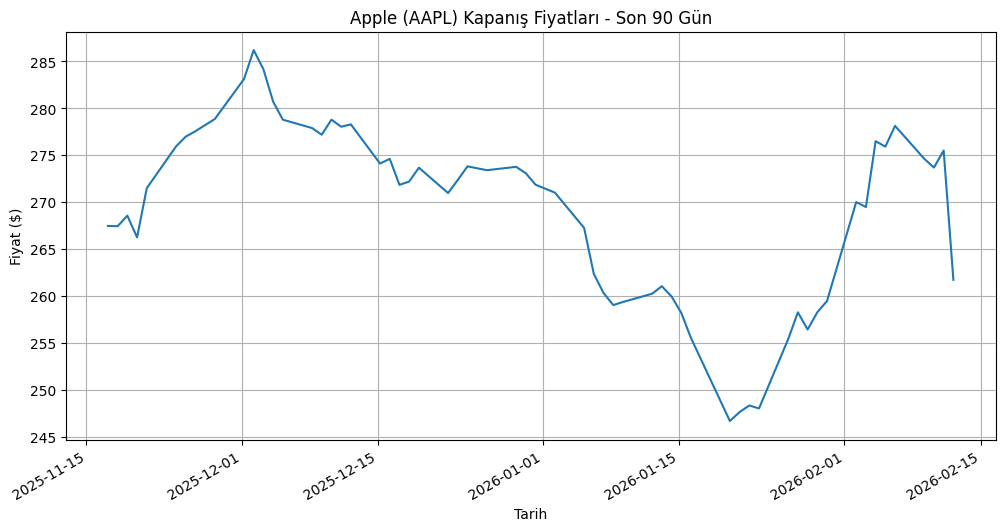

In [7]:
# Sadece kapanış fiyatını çizelim
plt.figure(figsize=(12, 6))
apple_df['close'].plot(title='Apple (AAPL) Kapanış Fiyatları - Son 90 Gün')
plt.xlabel('Tarih')
plt.ylabel('Fiyat ($)')
plt.grid(True)
plt.show()

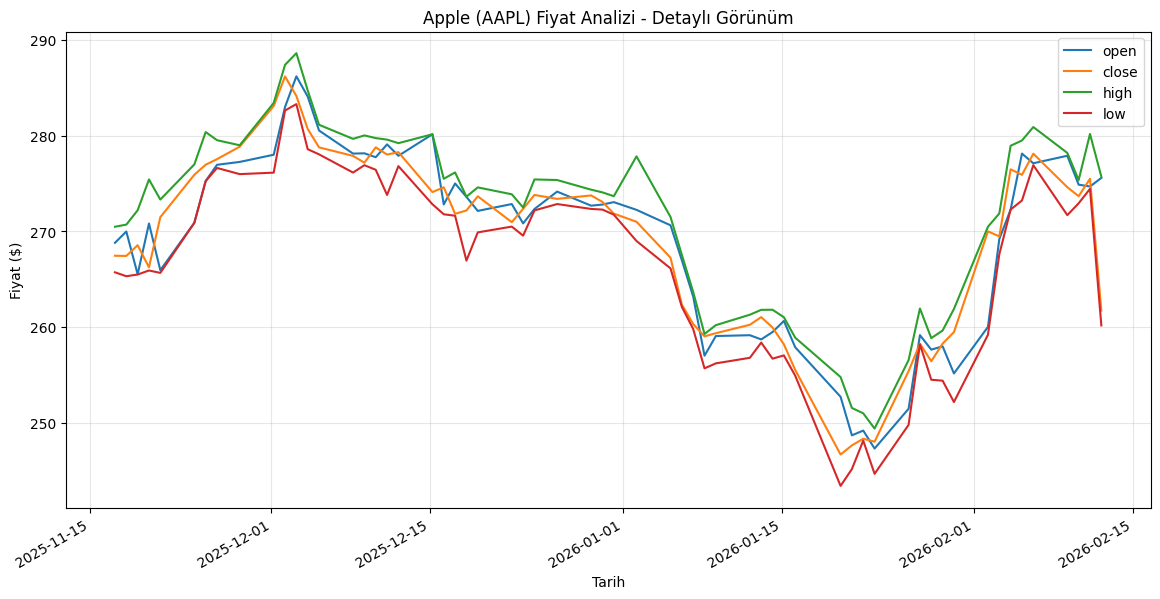

In [8]:
# 'open', 'close', 'high', 'low' kolonlarını birlikte çizelim
apple_df[['open', 'close', 'high', 'low']].plot(figsize=(14, 7))

plt.title('Apple (AAPL) Fiyat Analizi - Detaylı Görünüm')
plt.ylabel('Fiyat ($)')
plt.xlabel('Tarih')
plt.grid(alpha=0.3) # Izgarayı biraz şeffaflaştırarak daha şık yapalım
plt.legend(loc='best') # Kolon isimlerini grafiğin en uygun yerine koyar
plt.show()

In [10]:
print(f"Index adı 'date' mi?: {apple_df.index.name == 'date'}")
print(f"Kolonlar doğru mu?: {set(['open', 'close', 'high', 'low']).issubset(apple_df.columns)}")
print(f"Veri tipi datetime mı?: {pd.api.types.is_datetime64_any_dtype(apple_df.index)}")

Index adı 'date' mi?: True
Kolonlar doğru mu?: True
Veri tipi datetime mı?: True
